In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,save_img

In [3]:
def get_values(img):
    mask_red=np.array([1,0,0])
    mask_green=np.array([0,1,0])
    input_breg_img=img*mask_red
    input_img=img*mask_red
    output_img=(img+mask_green)*(img!=13)
    for i in range(0,12):
        filtered_img_green=img[:,:,1]==i
        for j in range(1,10):
            filtered_img_blue_mask=img[:,:,2]==j
            filtered_img=filtered_img_green*filtered_img_blue_mask
            if(np.sum(filtered_img)!=0):
                temp=np.argmax(filtered_img,axis=1)
                x_start=np.min(temp[temp!=0])
                temp=np.argmax(filtered_img,axis=0)
                y_start=np.min(temp[temp!=0])
                flip=np.flip(filtered_img)
                temp=np.argmax(flip,axis=1)
                x_end=255-np.min(temp[temp!=0])
                temp=np.argmax(flip,axis=0)
                y_end=255-np.min(temp[temp!=0])
                x_mid=int((x_start+x_end)/2)
                y_mid=int((y_start+y_end)/2)

                value=i+1
                if(i==0):
                    value=70

                input_img[y_mid-1][x_mid-1][1]=value
                input_img[y_mid-1][x_mid][1]=value
                input_img[y_mid-1][x_mid+1][1]=value

                input_img[y_mid][x_mid-1][1]=value
                input_img[y_mid][x_mid][1]=value
                input_img[y_mid][x_mid+1][1]=value
                
                input_img[y_mid+1][x_mid-1][1]=value
                input_img[y_mid+1][x_mid][1]=value
                input_img[y_mid+1][x_mid+1][1]=value
    
    return input_breg_img,input_img,output_img
            
            

In [4]:
# for i in range(0,80788):
#     path=f"./dataset/floorplan_dataset/{i}.png"
#     dest_path_in=f"./processed_dataset/image_gan_in/{i}.png"
#     dest_path_reg_in=f"./processed_dataset/image_breg_in/{i}.png"
#     dest_path_out=f"./processed_dataset/image_gan_out/{i}.png"
#     img=np.array(load_img(path))
#     input_reg_img,input_img,output_img=get_values(img)
#     save_img(dest_path_reg_in,input_reg_img)
#     save_img(dest_path_in,input_img)
#     save_img(dest_path_out,output_img)    
    

In [5]:
# for i in range(0,80788):
#     path=f"./dataset/floorplan_dataset/{i}.png"
#     dest_path_out=f"./processed_dataset/image_gan_out_wall/{i}.png"
#     img=np.array(load_img(path))
#     output_img=(img*np.array([0,1,0])==16)*255+(img*np.array([0,1,0])==17)*255+img*np.array([1,0,0])
#     save_img(dest_path_out,output_img)

In [6]:
color=[
    np.array([0,195,255]),      # living room
    np.array([0,15,255]),       # master room
    np.array([255,155,0]),      # kitchen
    np.array([255,0,245]),      # bathroom
    np.array([0,115,25]),       # dining room
    np.array([255,200,215]),    # child room
    np.array([185,100,255]),    # study room
    np.array([195,180,255]),    # Second room
    np.array([190,245,95]),     # guest room
    np.array([0,255,45]),       # Balcony
    np.array([115,255,215]),    # Entrance
    np.array([180,110,50]),     # Storage
    np.array([200,235,255]),    # Wall-in
    np.array([255,255,255]),    # External area
    np.array([0,0,0]),          # Exterior Wall
    np.array([255,0,0]),        # Front door
    np.array([0,0,0]),          # Interior wall
    np.array([255,255,0])       # interior door
]

def get_values_final(img):
    indoor=(np.reshape((img[:,:,2]!=0).astype(int)+(img[:,:,1]==17).astype(int)+(img[:,:,1]==16).astype(int),(256,256,1)))*np.array([[[235,235,235]]])
    outdoor=np.reshape(img[:,:,1]==13,(256,256,1))*np.array([[[255,255,255]]])
    door=np.reshape(img[:,:,0]==255,(256,256,1))*np.array([[[255,0,0]]])
    wall=np.reshape(img[:,:,0]==127,(256,256,1))*np.array([[[0,0,0]]])
    input_breg_img=indoor+outdoor+door+wall
    input_img=indoor+outdoor+door+wall
    output_img=img
    for i in range(0,17):
        filtered_img_green=img[:,:,1]==i
        output_img=output_img*(np.reshape(filtered_img_green==0,(256,256,1)))+(np.reshape(filtered_img_green,(256,256,1))*color[i])
        for j in range(1,10):
            filtered_img_blue_mask=img[:,:,2]==j
            filtered_img=filtered_img_green*filtered_img_blue_mask

            if(np.sum(filtered_img)!=0):
                temp=np.argmax(filtered_img,axis=1)
                x_start=np.min(temp[temp!=0])
                temp=np.argmax(filtered_img,axis=0)
                y_start=np.min(temp[temp!=0])
                flip=np.flip(filtered_img)
                temp=np.argmax(flip,axis=1)
                x_end=255-np.min(temp[temp!=0])
                temp=np.argmax(flip,axis=0)
                y_end=255-np.min(temp[temp!=0])
                x_mid=int((x_start+x_end)/2)
                y_mid=int((y_start+y_end)/2)

                value=color[i]

                input_img[y_mid-2][x_mid-2]=value
                input_img[y_mid-2][x_mid-1]=value
                input_img[y_mid-2][x_mid]=value
                input_img[y_mid-2][x_mid+1]=value
                input_img[y_mid-2][x_mid+2]=value

                input_img[y_mid-1][x_mid-2]=value
                input_img[y_mid-1][x_mid-1]=value
                input_img[y_mid-1][x_mid]=value
                input_img[y_mid-1][x_mid+1]=value
                input_img[y_mid-1][x_mid+2]=value

                input_img[y_mid][x_mid-2]=value
                input_img[y_mid][x_mid-1]=value
                input_img[y_mid][x_mid]=value
                input_img[y_mid][x_mid+1]=value
                input_img[y_mid][x_mid+2]=value
                
                input_img[y_mid+1][x_mid-2]=value
                input_img[y_mid+1][x_mid-1]=value
                input_img[y_mid+1][x_mid]=value
                input_img[y_mid+1][x_mid+1]=value
                input_img[y_mid+1][x_mid+2]=value

                input_img[y_mid+2][x_mid-2]=value
                input_img[y_mid+2][x_mid-1]=value
                input_img[y_mid+2][x_mid]=value
                input_img[y_mid+2][x_mid+1]=value
                input_img[y_mid+2][x_mid+2]=value
    
    return input_breg_img,input_img,output_img

In [ ]:
for i in range(0,80788):
    path=f"./dataset/floorplan_dataset/{i}.png"
    dest_path_in=f"./processed_dataset/image_gan_in_final/{i}.png"
    dest_path_reg_in=f"./processed_dataset/image_breg_in_final/{i}.png"
    dest_path_out=f"./processed_dataset/image_gan_out_final/{i}.png"
    img=np.array(load_img(path))
    input_reg_img,input_img,output_img=get_values_final(img)
    save_img(dest_path_reg_in,input_reg_img)
    save_img(dest_path_in,input_img)
    save_img(dest_path_out,output_img)    

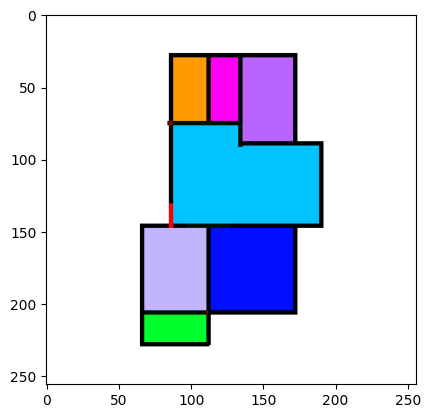

In [7]:
dest_path_out=f"./processed_dataset/image_gan_out_final/{80787}.png"
output_img=np.array(load_img(dest_path_out))
plt.imshow(output_img)

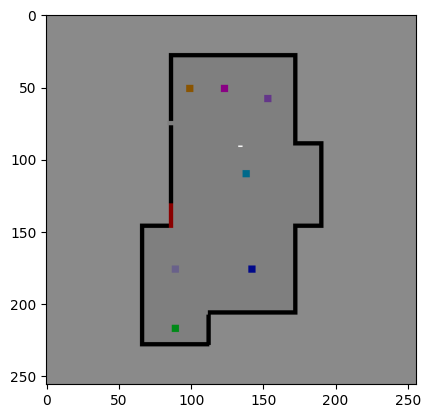

In [8]:
dest_path_in=f"./processed_dataset/image_gan_in_final/{80787}.png"
input_img=np.array(load_img(dest_path_in))
plt.imshow(input_img)

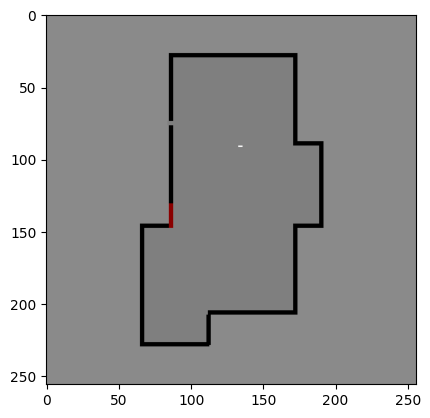

In [9]:
dest_path_breg_in=f"./processed_dataset/image_breg_in_final/{80787}.png"
breg_img=np.array(load_img(dest_path_breg_in))
plt.imshow(breg_img)